<a href="https://colab.research.google.com/github/faranak-jahedi/ML-Projects/blob/main/ML_Lab_excersice_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Lab: Support Vector Machines

In this lab, we'll use the ${\tt SVC}$ module from the ${\tt sklearn.svm}$ package to demonstrate the use of the support vector classifier and the SVM:

Portions of this lab on Support Vector Machines are a Python adaptation of p. 359-366 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. Original adaptation by J. Warmenhoven, updated by R. Jordan Crouser at Smith College for SDS293: Machine Learning (Spring 2016).


### Lab team members :


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

%matplotlib inline

# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

## Generate some data from random # generator

In [ ]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1]+1

Let's plot the data to see whether the classes are linearly separable:

Text(0, 0.5, 'X2')

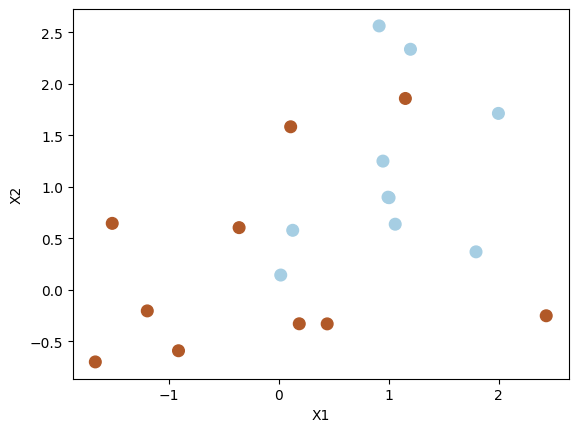

In [ ]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Data is not completely seperable.

### Exercise :
    before we run SVC, where would you put the maximum margin line ? (discuss, nothing to hand in)


I will have put a line from X1 = 1 to X2 = 2. Mostly because it will have the widest margin. In other words, it could generalize better.

## Support Vector Classifier

The ${\tt SVC()}$ function can be used to fit a
support vector classifier when the argument ${\tt kernel="linear"}$ is used.  The ${\tt c}$ argument allows us to specify the cost of a violation to the margin

* ${\tt c}$ argument is **small**, then the margins will be wide and many support vectors will be on the margin or will violate the margin.
* ${\tt c}$ argument is large, then the margins willbe narrow and there will be few support vectors on the margin or violating the margin.

We can use the ${\tt SVC()}$ function to fit the support vector classifier for a
given value of the ${\tt cost}$ parameter. Here we demonstrate the use of this
function on a two-dimensional example so that we can plot the resulting
decision boundary. Let's start by generating a set of observations, which belong
to two classes:

In [ ]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, kernel='linear')

We can now plot the support vector classifier by calling the ${\tt plot\_svc()}$ function on the output of the call to ${\tt SVC()}$, as well as the data used in the call to ${\tt SVC()}$:

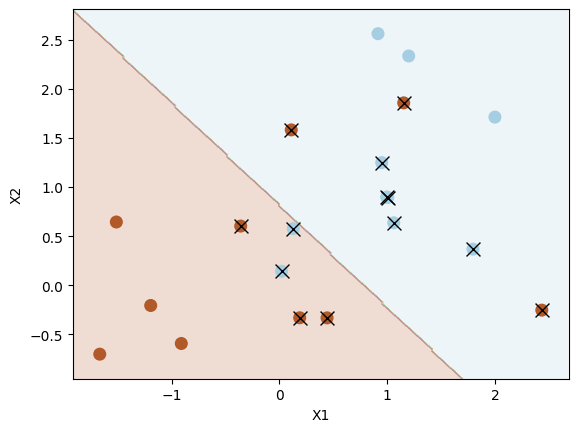

Number of support vectors:  13


In [ ]:
plot_svc(svc, X, y)

The region of feature space that will be assigned to the −1 class is shown in
light blue, and the region that will be assigned to the +1 class is shown in
brown. The decision boundary between the two classes is linear (because we
used the argument ${\tt kernel="linear"}$).

The support vectors are plotted with crosses
and the remaining observations are plotted as circles; we see here that there
are 13 support vectors. We can determine their identities as follows:

In [ ]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

What if we instead used a smaller value of the ${\tt cost}$ parameter?

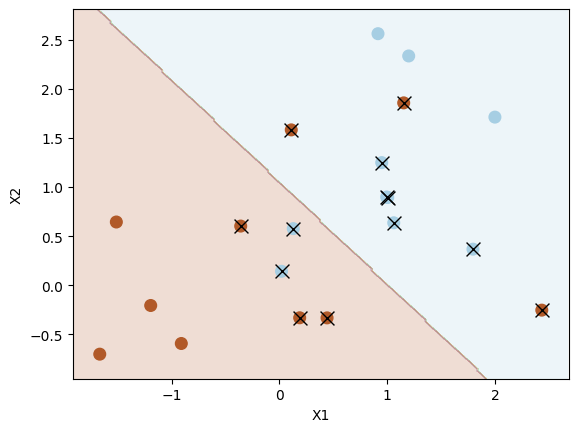

Number of support vectors:  13


In [ ]:
plot_svc((SVC(C=1000, kernel='linear').fit(X,y)), X, y)

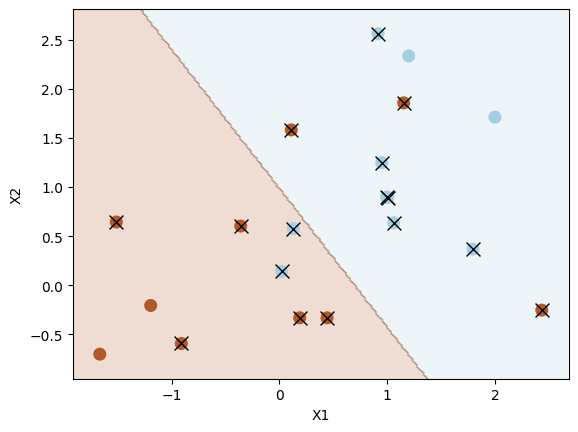

Number of support vectors:  16


In [ ]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

Now that a smaller value of the ${\tt c}$ parameter is being used, we obtain a
larger number of support vectors, because the margin is now **wider**.

The ${\tt sklearn.grid\_search}$ module includes a function ${\tt GridSearchCV()}$ to perform cross-validation. In order to use this function, we pass in relevant information about the set of models that are under consideration. The
following command indicates that we want perform 10-fold cross-validation to compare SVMs with a linear
kernel, using a range of values of the cost parameter:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

We can easily access the cross-validation errors for each of these models:

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.0010958 , 0.00071485, 0.00084739, 0.00072048, 0.00073225,
        0.0007683 , 0.00100005]),
 'std_fit_time': array([7.11699582e-04, 7.86206729e-06, 2.24058591e-04, 1.83976512e-05,
        2.45246974e-05, 4.14371559e-05, 2.00485452e-04]),
 'mean_score_time': array([0.00069702, 0.0005372 , 0.00054829, 0.00053515, 0.00053811,
        0.00054135, 0.00059626]),
 'std_score_time': array([3.78246267e-04, 9.46542778e-06, 2.27881396e-05, 1.44671954e-05,
        2.30105428e-05, 2.46760811e-05, 9.78487654e-05]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0

The ${\tt GridSearchCV()}$ function stores the best parameters obtained, which can be accessed as
follows:

In [ ]:
clf.best_params_

{'C': 0.001}

c=0.001 is best according to ${\tt GridSearchCV}$.



## Generate some test data and evaluate
As usual, the ${\tt predict()}$ function can be used to predict the class label on a set of
test observations, at any given value of the cost parameter. Let's
generate a test data set:

In [ ]:
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1]-1

Now we predict the class labels of these test observations. Here we use the
best model obtained through cross-validation in order to make predictions:

In [ ]:
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


With this value of ${\tt c}$, 14 of the test observations are correctly
classified.


## Non-Linear Kernels : Support Vector Machine

In order to fit an SVM using a **non-linear kernel**, we once again use the ${\tt SVC()}$
function. However, now we use a different value of the parameter kernel.
To fit an SVM with a polynomial kernel we use ${\tt kernel="poly"}$, and
to fit an SVM with a radial kernel we use ${\tt kernel="rbf"}$. In the former
case we also use the ${\tt degree}$ argument to specify a degree for the polynomial
kernel, and in the latter case we use ${\tt gamma}$ to specify a
value of $\gamma$ for the radial basis kernel.

Let's generate some data with a non-linear class boundary:

Text(0, 0.5, 'X2')

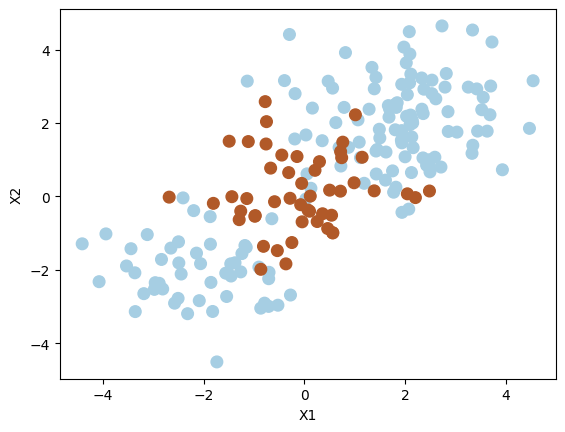

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

See how one class is kind of stuck in the middle of another class? This suggests that we might want to use a **radial kernel** in our SVM. Now let's fit
the training data using the ${\tt SVC()}$ function with a radial kernel and $\gamma = 1$:

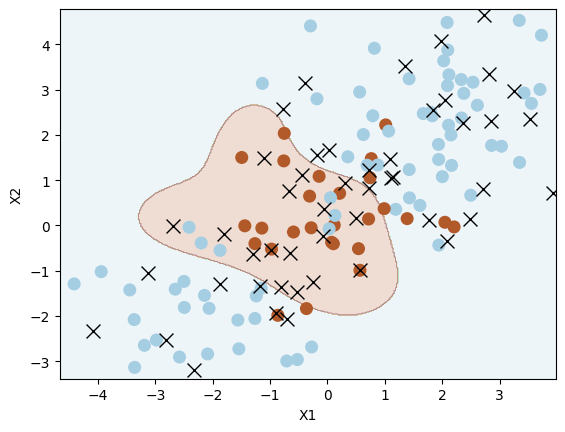

Number of support vectors:  51


In [ ]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

The plot shows that the resulting SVM has a decidedly non-linear
boundary. We can see from the figure that there are a fair number of training errors
in this SVM fit. If we increase the value of cost, we can reduce the number
of training errors:

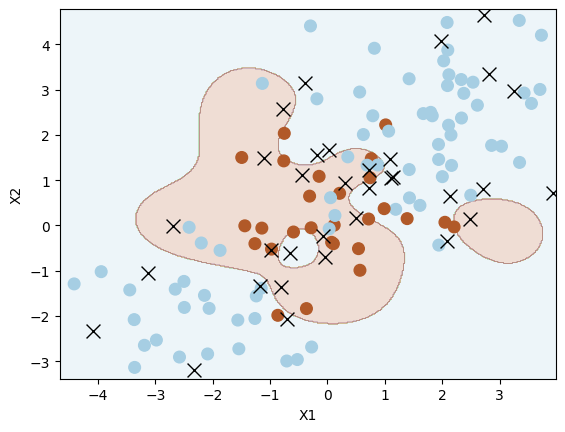

Number of support vectors:  36


In [ ]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data. We can perform cross-validation using ${\tt GridSearchCV()}$ to select the best choice of
$\gamma$ and cost for an SVM with a radial kernel:

In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 10, 'gamma': 0.5}

Therefore, the best choice of parameters involves ${\tt cost=10}$ and ${\tt gamma=0.5}$. We
can plot the resulting fit using the ${\tt plot\_svc()}$ function, and view the test set predictions for this model by applying the ${\tt predict()}$
function to the test data:

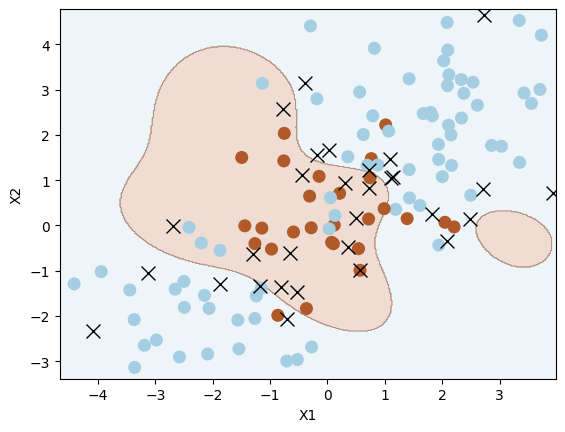

Number of support vectors:  32
    -1   1
-1  66   7
 1   6  21
0.87


In [ ]:
plot_svc(clf.best_estimator_, X_test, y_test)
y_pred = clf.best_estimator_.predict(X_test)
print(pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_))
print(clf.best_estimator_.score(X_test, y_test))

85% of test observations are correctly classified by this SVM.



## ROC Curves

The ${\tt auc()}$ function from the ${\tt sklearn.metrics}$ package can be used to produce ROC curves such as those we saw in lecture:
Let's start by fitting two models, one more flexible than the other:

In [ ]:
# More constrained model
svm3 = SVC(C=10, kernel='rbf', gamma=1)
svm3.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [ ]:
# More flexible model
svm4 = SVC(C=10, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=10, gamma=50)

SVMs and support vector classifiers output class labels for each observation.
However, it is also possible to obtain fitted values for each observation,
which are the numerical scores used to obtain the class labels. For instance,
in the case of a support vector classifier, the fitted value for an observation
$X = (X_1,X_2, . . .,X_p)^T$ takes the form $\hat\beta_0 + \hat\beta_1X_1 + \hat\beta_2X_2 + . . . + \hat\beta_pX_p$.

In order to obtain the fitted values for a given SVM model fit, we
use the ${\tt .decision\_function()}$ method of the SVC:

In [ ]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

Now we can produce the ROC plot to see how the models perform on both the training and the test data:

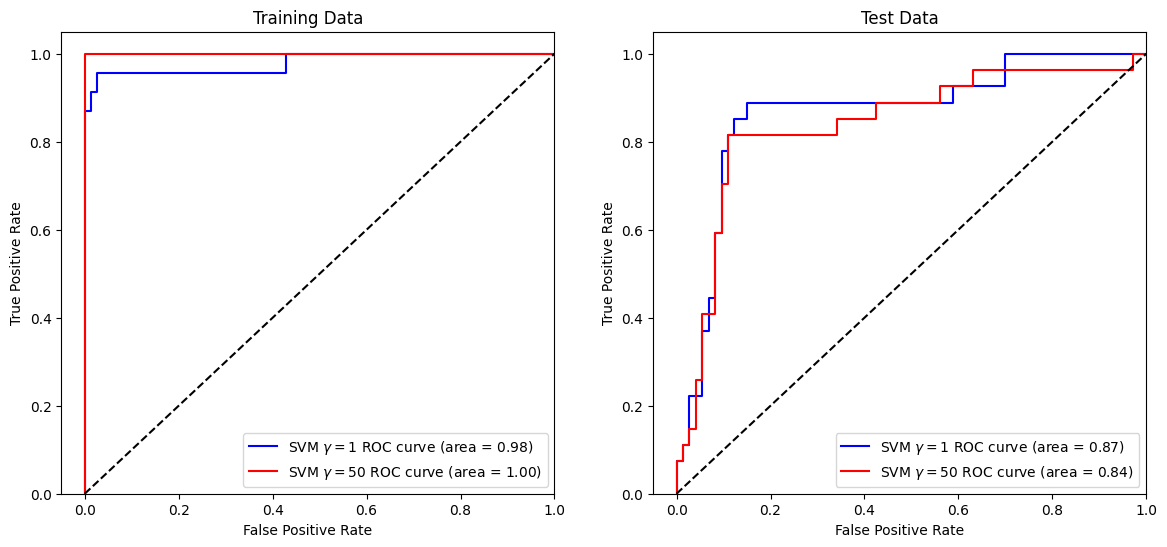

In [ ]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

## Application to "Musk" data

The dataset that we will use for this example was provided by the UCI Machine Learning Repository and can be found here: <a href="https://archive.ics.uci.edu/ml/datasets/Musk+(Version+2)">Musk (Version 2) Data Set</a> From Wikipedia (https://en.wikipedia.org/wiki/Musk) : Musk is a class of aromatic substances commonly used as base notes in perfumery. They include glandular secretions from animals such as the musk deer, numerous plants emitting similar fragrances, and artificial substances with similar odors. Musk was a name originally given to a substance with a strong odor obtained from a gland of the musk deer.

This dataset describes a set of 102 molecules of which 39 are judged by human experts to be musks and the remaining 63 molecules are judged to be non-musks. The goal is to learn to predict whether new molecules will be musks or non-musks.  The original data is compressed, so we link to an uncompressed version.  Also, there are no missing values so we can skip that part of the data preparation

## Read in the data, set up train, test df

In [ ]:
musk_url = "https://raw.githubusercontent.com/bruceMacLeod/COS475-575/main/Lab/data/musk_csv.csv"
df = pd.read_csv(musk_url)
# Preview the first 5 lines of the loaded data
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [ ]:
print("dimensions: " , df.shape,"\n")
print("Breakdown by class:")
print(df.groupby('class').size())

dimensions:  (6598, 170) 

Breakdown by class:
class
0    5581
1    1017
dtype: int64


In [ ]:
X = df.iloc[:,3:169]
y = df.iloc[:, 169]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.20)


## Exercise :

Okay, now it is your turn :

* Does the data need to be scaled ?
* Evaluate a linear Support Vector machine. Start by choosing an arbitrary **C** value and then use grid search to find the best value. Provide the confusion matrix for the best hyperparameters found from the grid search

### Graduate Students/Extra Credit
* Evaluate a non-linear Support Vector Machine. Start by choosing the kernel : for now poly or rbf. Provide a rationale for your choice.
* Choose some arbitrary values for the hyperparameters and then use grid search to find the best value. Provide the confusion matrix for the best values found by the grid search.
* Provide the ROC curves for a couple of reasonable options of the hyperparameters.  

Does the data need to be scaled? <br>
<strong>Answer:</strong> Yes, Although I think Needing a scale or not deponds on the algorithm and some features in our model we are using.Because we have SVM here and the dataset contains continuous features,scaling the data will lead to better model performance and generalization.

In [ ]:
# Pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_clf = Pipeline ([
    ("scaler", StandardScaler()),
])

Xtrain_scaled = svm_clf.fit_transform(Xtrain)
Xtest_scaled = svm_clf.fit_transform(Xtest)

In [ ]:
# Evaluating a linear Support Vector Machine with an arbitrary C
svc = SVC(C=0.1, kernel='linear')
svc.fit(Xtrain_scaled, ytrain)

SVC(C=0.1, kernel='linear')

In [ ]:
svc.support_

array([  13,   19,   22,   29,   31,   42,   43,   49,   65,   70,   80,
        102,  119,  122,  137,  144,  161,  166,  169,  178,  181,  183,
        185,  214,  231,  265,  307,  326,  347,  365,  370,  408,  410,
        418,  427,  438,  451,  462,  465,  478,  493,  498,  544,  589,
        594,  595,  607,  624,  633,  641,  652,  675,  684,  694,  708,
        712,  716,  720,  732,  758,  766,  769,  771,  795,  804,  808,
        835,  847,  848,  868,  870,  875,  881,  889,  898,  909,  919,
        925,  930,  961,  965,  984, 1001, 1009, 1013, 1015, 1030, 1047,
       1050, 1055, 1058, 1061, 1065, 1067, 1075, 1079, 1086, 1093, 1096,
       1113, 1134, 1155, 1163, 1167, 1213, 1214, 1225, 1239, 1254, 1282,
       1292, 1308, 1319, 1329, 1346, 1350, 1353, 1354, 1360, 1421, 1441,
       1450, 1457, 1460, 1481, 1489, 1523, 1531, 1545, 1583, 1590, 1592,
       1611, 1621, 1629, 1649, 1672, 1680, 1687, 1696, 1698, 1724, 1730,
       1737, 1740, 1742, 1745, 1748, 1789, 1807, 18

In [ ]:
# Confusion matrix with random C, which is 0.1

y_pred = svc.predict(Xtest_scaled)
pd.DataFrame(confusion_matrix(ytest, y_pred), index=svc.classes_, columns=svc.classes_)

,0,1
0,1087,18
1,50,165


In [ ]:
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(Xtrain_scaled, ytrain)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [ ]:
clf.best_params_

{'C': 1}

In [ ]:
# Using the best parameter for C
svc2 = SVC(C=1, kernel='linear')
svc2.fit(Xtrain_scaled, ytrain)
y_pred = svc2.predict(Xtest_scaled)
pd.DataFrame(confusion_matrix(ytest, y_pred), index=svc2.classes_, columns=svc2.classes_)

,0,1
0,1084,21
1,38,177


Evaluate a non-linear Support Vector Machine. Start by choosing the kernel : for now poly or rbf. Provide a rationale for your choice.

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import pandas as pd

# Data preprocessing with StandardScaler
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
])
Xtrain_scaled = svm_clf.fit_transform(Xtrain)
Xtest_scaled = svm_clf.fit_transform(Xtest)

# Evaluating an SVM with the RBF kernel
rbf_svc = SVC(kernel='rbf', C=1.0)
rbf_svc.fit(Xtrain_scaled, ytrain)
y_pred_rbf = rbf_svc.predict(Xtest_scaled)

# Confusion matrix for RBF SVM
confusion_rbf = pd.DataFrame(confusion_matrix(ytest, y_pred_rbf), index=rbf_svc.classes_, columns=rbf_svc.classes_)

# Hyperparameter tuning for C
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(Xtrain_scaled, ytrain)

# Best parameter for C
best_C = clf.best_params_['C']

# Evaluating an SVM with the RBF kernel and the best C
best_rbf_svc = SVC(kernel='rbf', C=best_C)
best_rbf_svc.fit(Xtrain_scaled, ytrain)
y_pred_best_rbf = best_rbf_svc.predict(Xtest_scaled)

# Confusion matrix for the best RBF SVM
confusion_best_rbf = pd.DataFrame(confusion_matrix(ytest, y_pred_best_rbf), index=best_rbf_svc.classes_, columns=best_rbf_svc.classes_)

Choose some arbitrary values for the hyperparameters and then use grid search to find the best value. Provide the confusion matrix for the best values found by the grid search.

In [ ]:
# in this code I provide a GridSearch over a range of arbitrary values for 'C'and 'gamma'.
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define arbitrary values for C and gamma
arbitrary_C = [0.1, 1, 10]
arbitrary_gamma = [0.001, 0.01, 0.1]

# Create a parameter grid to search over
param_grid = {'C': arbitrary_C, 'gamma': arbitrary_gamma}

# Initialize the SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_rbf, param_grid, cv=10, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(Xtrain_scaled, ytrain)

# Get the best parameters from grid search
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

# Train an SVM with the best hyperparameters
best_svm = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
best_svm.fit(Xtrain_scaled, ytrain)

# Make predictions
y_pred_best = best_svm.predict(Xtest_scaled)

# Confusion matrix for the best SVM
confusion_best = pd.DataFrame(confusion_matrix(ytest, y_pred_best), index=best_svm.classes_, columns=best_svm.classes_)

# Display the best hyperparameters and the confusion matrix
print("Best Hyperparameters (C and gamma):", best_C, best_gamma)
print("Confusion Matrix for the Best SVM:")
print(confusion_best)


Best Hyperparameters (C and gamma): 10 0.01
Confusion Matrix for the Best SVM:
      0    1
0  1101    4
1     3  212


Provide the ROC curves for a couple of reasonable options of the hyperparameters.

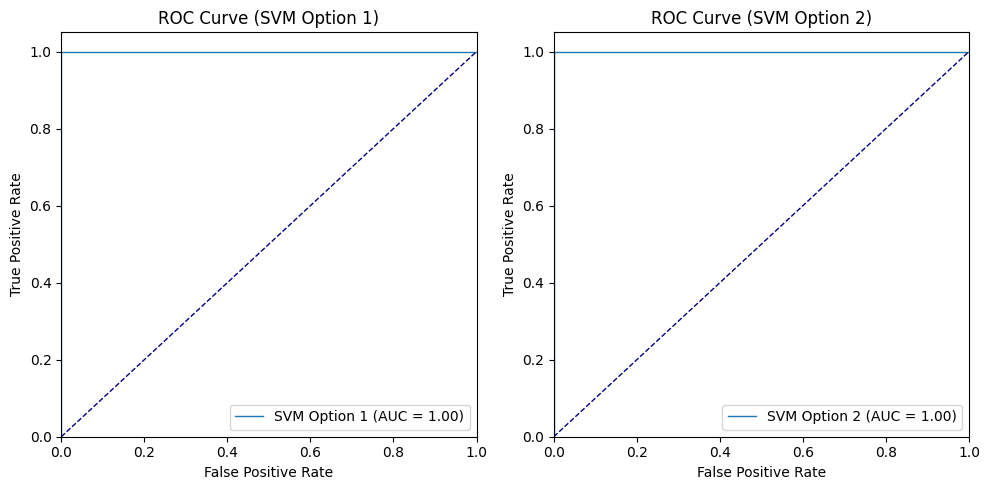

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Define a range of hyperparameter options (e.g., different values of C and gamma)
hyperparameter_options = [
    {'C': 1, 'gamma': 0.1},
    {'C': 10, 'gamma': 1}
    # Add more hyperparameter options as needed
]

# Create subplots for ROC curves
plt.figure(figsize=(10, 5))

for i, hyperparameters in enumerate(hyperparameter_options):
    # Initialize SVM with the selected hyperparameters
    svm = SVC(kernel='rbf', **hyperparameters)

    # Train the model
    svm.fit(Xtrain_scaled, ytrain)

    # Compute decision function values for training data
    y_train_score = svm.decision_function(Xtrain_scaled)

    # Compute ROC curve
    false_pos_rate, true_pos_rate, _ = roc_curve(ytrain, y_train_score)

    # Calculate AUC (Area Under the Curve)
    roc_auc = auc(false_pos_rate, true_pos_rate)

    # Plot the ROC curve
    plt.subplot(1, 2, i + 1)
    plt.plot(false_pos_rate, true_pos_rate, lw=1, label=f'SVM Option {i + 1} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (SVM Option {i + 1})')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()